# Loading requirements

#### Loading the database and the libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import  WordCloud
import string
from nltk.corpus import stopwords
import nltk 
from PIL import Image
import numpy as np

sns.set_style("darkgrid")

# Loading the first 
# movies = pd.read_csv("IMDB Dataset.csv").drop_duplicates()


def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc).lower()
    
    # Now just remove any stopwords
    # [print(word) for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    # return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return nopunc


movies = pd.read_csv("clean_movies_database.csv",index_col=False).drop(["review","review_nopunc"],axis=1)
movies.review_clean = movies.review_clean.apply(lambda x: [word.strip(''' "[']''') for word in x.split(",")]) 

## EDA

#### Exploring the data to extract useful information out of it.

AxesSubplot(0.125,0.125;0.775x0.755)
positive    24884
negative    24698
Name: sentiment, dtype: int64


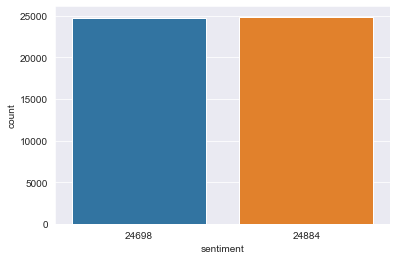

In [2]:
print(sns.countplot(data=movies.sentiment.value_counts(),x=movies.sentiment))
print(movies.sentiment.value_counts())

<AxesSubplot:ylabel='Frequency'>

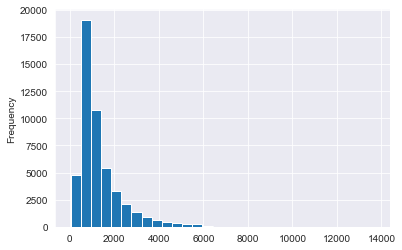

In [3]:
movies["length"]  = movies.review.apply(len)
movies.length.plot(bins=30,kind="hist")

In [49]:
movies.length.describe()

count    49582.000000
mean      1310.568230
std        990.762238
min         32.000000
25%        699.000000
50%        971.000000
75%       1592.000000
max      13704.000000
Name: length, dtype: float64

In [11]:
# movies["review_nopunc"] = movies.review.apply(text_process)

In [18]:
# movies["review_clean"] = movies.review_nopunc.apply(lambda x: [word for word in x.split() if word.lower() not in stopwords.words('english')])

# Creating a WordCloud 

## This will help to visualize the frequency of some words, later it will be used on lemmas and different tokenization techniques.

In [36]:
# Array to create a mask used for the wordcloud 

mask = np.array(Image.open(r"C:\Users\javie\Desktop\Python\Portfolio\imdbNLP\photo.png"))

In [40]:

cloud = WordCloud(background_color=None,
                prefer_horizontal=.5,
                colormap="coolwarm",
                stopwords = stopwords.words('english'),
                height=1080,width=1920,
                max_words=2000,
                mode = "RGBA",
                scale=4,
                # max_font_size=200,
                # relative_scaling=.8,
                repeat=True,
                # collocations= True,
                mask=mask,
                margin=1)
                
cloud.generate_from_text(str(movies.review_clean).replace("'",""))
for item in ["bad","br","oz","e","su","review_clean","Length","dtype","object"]:    
    cloud.words_.pop(item)
# cloud.generate(str(movies.review_clean[0:20000]).replace("'",""))
cloud.to_file("movie3.png")



In [ ]:
cloud.words_

{'one': 0.6666666666666666,
 'wonderful': 0.6666666666666666,
 'little': 0.6666666666666666,
 'thought': 0.6666666666666666,
 'time': 0.6666666666666666,
 'movie': 0.6666666666666666,
 'reviewers': 0.3333333333333333,
 'mentioned': 0.3333333333333333,
 'watching': 0.3333333333333333,
 'production': 0.3333333333333333,
 'filmin': 0.3333333333333333,
 'way': 0.3333333333333333,
 'spend': 0.3333333333333333,
 'hot': 0.3333333333333333,
 'basically': 0.3333333333333333,
 'theres': 0.3333333333333333,
 'family': 0.3333333333333333,
 'boy': 0.3333333333333333,
 'jake': 0.3333333333333333,
 'petter': 0.3333333333333333,
 'matteis': 0.3333333333333333,
 'love': 0.3333333333333333,
 'money': 0.3333333333333333,
 'visually': 0.3333333333333333,
 'right': 0.3333333333333333,
 'good': 0.3333333333333333,
 'job': 0.3333333333333333,
 'wasnt': 0.3333333333333333,
 'crea': 0.3333333333333333,
 'plot': 0.3333333333333333,
 'dialogue': 0.3333333333333333,
 'acting': 0.3333333333333333,
 'idioti': 0.333

In [25]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
# nltk.download('wordnet')

In [40]:
word="calibrating"
word = lemmatizer.lemmatize(word,pos="v")
print(word)

calibrate


In [50]:

for i in range(len(movies["review_clean"])):
    for word in movies["review_clean"][i]:
        word = lemmatizer.lemmatize(word,pos="v")
        word = lemmatizer.lemmatize(word,pos="a")
        word = lemmatizer.lemmatize(word,pos="n")
    print(f"Row {i} done!")

print(movies["review_clean"].head(5))

Row 0 done!
Row 1 done!
Row 2 done!
Row 3 done!
Row 4 done!
Row 5 done!
Row 6 done!
Row 7 done!
Row 8 done!
Row 9 done!
Row 10 done!
Row 11 done!
Row 12 done!
Row 13 done!
Row 14 done!
Row 15 done!
Row 16 done!
Row 17 done!
Row 18 done!
Row 19 done!
Row 20 done!
Row 21 done!
Row 22 done!
Row 23 done!
Row 24 done!
Row 25 done!
Row 26 done!
Row 27 done!
Row 28 done!
Row 29 done!
Row 30 done!
Row 31 done!
Row 32 done!
Row 33 done!
Row 34 done!
Row 35 done!
Row 36 done!
Row 37 done!
Row 38 done!
Row 39 done!
Row 40 done!
Row 41 done!
Row 42 done!
Row 43 done!
Row 44 done!
Row 45 done!
Row 46 done!
Row 47 done!
Row 48 done!
Row 49 done!
Row 50 done!
Row 51 done!
Row 52 done!
Row 53 done!
Row 54 done!
Row 55 done!
Row 56 done!
Row 57 done!
Row 58 done!
Row 59 done!
Row 60 done!
Row 61 done!
Row 62 done!
Row 63 done!
Row 64 done!
Row 65 done!
Row 66 done!
Row 67 done!
Row 68 done!
Row 69 done!
Row 70 done!
Row 71 done!
Row 72 done!
Row 73 done!
Row 74 done!
Row 75 done!
Row 76 done!
Row 77 do

In [51]:
movies

,sentiment,review_clean
0,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,positive,"[wonderful, little, production, br, br, filmin..."
2,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,negative,"[basically, theres, family, little, boy, jake,..."
4,positive,"[petter, matteis, love, time, money, visually,..."
...,...,...
49577,positive,"[thought, movie, right, good, job, wasnt, crea..."
49578,negative,"[bad, plot, bad, dialogue, bad, acting, idioti..."
49579,negative,"[catholic, taught, parochial, elementary, scho..."
49580,negative,"[im, going, disagree, previous, comment, side,..."


In [58]:
train_X_vectors

<8000x66317 sparse matrix of type '<class 'numpy.int64'>'
	with 717105 stored elements in Compressed Sparse Row format>

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X = movies.review_clean[0:10000]
y = movies.sentiment[0:10000]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train/test split finished.\n")


vectorizer = CountVectorizer(stop_words="english",binary=False)
print("Vectorizer created.\n")
train_X_vectors = vectorizer.fit_transform(X.apply(str))
print("Bag of words fitted into a vector.\n")


Train/test split finished.

Vectorizer created.

Bag of words fitted into a vector.



In [66]:
X_train_vectors = vectorizer.transform(X_train.apply(str))
y_train_vectors = vectorizer.transform(y_train.apply(str))
X_test_vectors = vectorizer.transform(X_test.apply(str))
y_test_vectors = vectorizer.transform(y_test.apply(str))
print("Train/test split fitted into the bag of words vector.\n")


model = SVC(kernel="linear")
print(f"Model created, currently using:      {model}\n")
model.fit(X_train_vectors, y_train)
print("Model fitted with training vectors.\n")
print(f"Model mean average score:    {model.score(X_train_vectors, y_train)}\n")

predictions = model.predict(X_test_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {model}")
print (classification_report(y_test, predictions))

data_sample = movies[30000:33000]

X_val_vectors = vectorizer.transform(data_sample.review_clean.apply(str))
y_val_vectors = vectorizer.transform(data_sample.sentiment)

predictions_newdata = model.predict(X_val_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {model}")
print (classification_report(data_sample.sentiment, predictions_newdata))

Train/test split fitted into the bag of words vector.

Model created, currently using:      SVC(kernel='linear')

Model fitted with training vectors.

Model mean average score:    1.0

Model fitted with testing vectors.

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.86      0.84      0.85      1027
    positive       0.84      0.86      0.85       973

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000

Model fitted with testing vectors.

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.84      0.83      0.84      1514
    positive       0.83      0.84      0.84      1486

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0

https://www.youtube.com/watch?v=xvqsFTUsOmc

# Training and fitting a model. 

#### Using a SVM Classifier.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X = movies.review[0:40000]
y = movies.sentiment[0:40000]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train/test split finished.\n")


vectorizer = CountVectorizer(stop_words="english",binary=True)
print("Vectorizer created.\n")
train_X_vectors = vectorizer.fit_transform(X)
print("Bag of words fitted into a vector.\n")

X_train_vectors = vectorizer.transform(X_train)
y_train_vectors = vectorizer.transform(y_train)
X_test_vectors = vectorizer.transform(X_test)
y_test_vectors = vectorizer.transform(y_test)
print("Train/test split fitted into the bag of words vector.\n")


model = SVC(kernel="linear")
print(f"Model created, currently using:      {model}\n")
model.fit(X_train_vectors, y_train)
print("Model fitted with training vectors.\n")
print(f"Model mean average score:    {model.score(X_train_vectors, y_train)}\n")

predictions = model.predict(X_test_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {model}")
print (classification_report(y_test, predictions))

data_sample = movies[40000:45000]

X_val_vectors = vectorizer.transform(data_sample.review)
y_val_vectors = vectorizer.transform(data_sample.sentiment)

predictions_newdata = model.predict(X_val_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {model}")
print (classification_report(data_sample.sentiment, predictions_newdata))

Train/test split finished.

Vectorizer created.

Bag of words fitted into a vector.

Train/test split fitted into the bag of words vector.

Model created, currently using:      SVC(kernel='linear')

Model fitted with training vectors.

Model mean average score:    0.99978125

Model fitted with testing vectors.

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.87      0.86      0.86      4035
    positive       0.86      0.87      0.86      3965

    accuracy                           0.86      8000
   macro avg       0.86      0.86      0.86      8000
weighted avg       0.86      0.86      0.86      8000

Model fitted with testing vectors.

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.86      0.85      0.85      2465
    positive       0.86      0.86      0.86      2535

    accuracy                           0.86      5000
  

In [22]:
data_sample = movies[45000:]

X_val_vectors = vectorizer.transform(data_sample.review)
y_val_vectors = vectorizer.transform(data_sample.sentiment)

predictions_newdata = model.predict(X_val_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {model}")
print (classification_report(data_sample.sentiment, predictions_newdata))

Model fitted with testing vectors.

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.85      0.86      0.86      2291
    positive       0.86      0.85      0.86      2291

    accuracy                           0.86      4582
   macro avg       0.86      0.86      0.86      4582
weighted avg       0.86      0.86      0.86      4582



# Saving the model

#### For future uses and to be time efficient

In [ ]:

with open('pickle_model.pickle', 'wb') as f:
    pickle.dump(model, f)
    
with open('pickle_model.pickle', 'rb') as g:
    loaded_model = pickle.load(g)

# Sources

    KG:     https://www.youtube.com/watch?v=M9Itm95JzL0   (watched this completely)
    KG:     https://www.youtube.com/watch?v=vyOgWhwUmec
    FCC:    https://www.youtube.com/watch?v=X2vAabgKiuM
    DS:     https://www.youtube.com/watch?v=hHr_cBKkRfQ
    SDX:    https://www.youtube.com/playlist?list=PLQVvvaa0QuDf2JswnfiGkliBInZnIC4HL

    https://www.kdnuggets.com/2019/01/solve-90-nlp-problems-step-by-step-guide.html


# Model testing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
import pickle

sns.set_style("darkgrid")

movies = pd.read_csv("IMDB Dataset.csv").drop_duplicates()
movies

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
with open('pickle_model.pickle', 'rb') as g:
    loaded_model = pickle.load(g)

In [8]:
X = movies.review
y = movies.sentiment
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train/test split finished.\n")

vectorizer = CountVectorizer(stop_words="english",binary=True)
print("Vectorizer created.\n")
train_X_vectors = vectorizer.fit_transform(X)
print("Bag of words fitted into a vector.\n")

X_train_vectors = vectorizer.transform(X_train)
y_train_vectors = vectorizer.transform(y_train)
X_test_vectors = vectorizer.transform(X_test)
y_test_vectors = vectorizer.transform(y_test)
print("Train/test split fitted into the bag of words vector.\n")

predictions = loaded_model.predict(X_test_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {loaded_model}")
print (classification_report(y_test, predictions))

Train/test split finished.

Vectorizer created.

Bag of words fitted into a vector.

Train/test split fitted into the bag of words vector.

Model fitted with testing vectors.

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.97      0.97      0.97      4949
    positive       0.97      0.97      0.97      4968

    accuracy                           0.97      9917
   macro avg       0.97      0.97      0.97      9917
weighted avg       0.97      0.97      0.97      9917



## Predictions

#### Set up different variables to fine tune the model

In [4]:
from sklearn.model_selection import train_test_split

X = movies.review
y = movies.sentiment
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train/test split finished.\n")

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english",binary=False)
print("Vectorizer created.\n")
train_X_vectors = vectorizer.fit_transform(X)
print("Bag of words fitted into a vector.\n")

X_train_vectors = vectorizer.transform(X_train)
y_train_vectors = vectorizer.transform(y_train)
X_test_vectors = vectorizer.transform(X_test)
y_test_vectors = vectorizer.transform(y_test)
print("Train/test split fitted into the bag of words vector.\n")

from sklearn.metrics import classification_report
predictions = loaded_model.predict(X_test_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {loaded_model}")
print (classification_report(y_test, predictions))

Train/test split finished.

Vectorizer created.

Bag of words fitted into a vector.

Train/test split fitted into the bag of words vector.

Model fitted with testing vectors.

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.93      0.96      0.95      4850
    positive       0.96      0.93      0.95      5067

    accuracy                           0.95      9917
   macro avg       0.95      0.95      0.95      9917
weighted avg       0.95      0.95      0.95      9917



In [25]:
movies = movies[0:10000]

In [3]:
bow_transformer = CountVectorizer(stop_words="english",binary=False).fit(movies.review)

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

101583


In [5]:
movies_review = bow_transformer.transform(movies['review'])

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(movies_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer
X=movies.review
y=movies.sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train/test split finished.\n")


vectorizer = CountVectorizer(stop_words="english",binary=True)
print("Vectorizer created.\n")
train_X_vectors = vectorizer.fit_transform(X_train)
print("Bag of words fitted into a vector.\n")

X_train_vectors = vectorizer.transform(X_train)
y_train_vectors = vectorizer.transform(y_train)
X_test_vectors = vectorizer.transform(X_test)
y_test_vectors = vectorizer.transform(y_test)
print("Train/test split fitted into the bag of words vector.\n")


model = TfidfTransformer()
print(f"Model created, currently using:      {model}\n")
model.fit(X_train_vectors, y_train)
print("Model fitted with training vectors.\n")
# print(f"Model mean average score:    {model.score(X_train_vectors, y_train)}\n")

predictions = model.predict(X_test_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {model}")
print (classification_report(y_test, predictions))



Train/test split finished.

Vectorizer created.

Bag of words fitted into a vector.

Train/test split fitted into the bag of words vector.

Model created, currently using:      TfidfTransformer()

Model fitted with training vectors.



AttributeError: 'TfidfTransformer' object has no attribute 'predict'